## Обзор данных

Импортируем библиотеку `pandas`. Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

Выведем 15 строчек датафрейма `data` на экран.

In [3]:
data.sample(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14532,Freaky Flyers,XB,2003.0,Racing,0.02,0.01,0.00,0.00,64.0,tbd,T
7156,Petz Monkeyz House,DS,2008.0,Simulation,0.20,0.00,0.00,0.02,NaN,tbd,E
3502,Ben 10: Alien Force,PS2,2008.0,Action,0.22,0.02,0.00,0.33,NaN,5.3,E10+
9269,NBA Jam,XB,2003.0,Sports,0.10,0.03,0.00,0.00,68.0,9.1,E
3293,WWE SmackDown vs. Raw 2010,PSP,2009.0,Fighting,0.25,0.22,0.00,0.14,NaN,6.6,T
5645,Riven: The Sequel to Myst,PS,1997.0,Adventure,0.18,0.12,0.00,0.02,NaN,NaN,NaN
4199,Kong: The 8th Wonder of the World,GBA,2005.0,Action,0.33,0.12,0.00,0.01,59.0,tbd,E10+
5484,Hell's Kitchen: The Game,Wii,2008.0,Simulation,0.30,0.00,0.00,0.03,NaN,NaN,NaN
149,The Last of Us,PS3,2013.0,Action,2.41,2.18,0.28,0.99,95.0,9.1,M
12621,Resident Evil - Code: Veronica X,GC,2003.0,Action,0.05,0.01,0.00,0.00,62.0,8.5,M


Выведем основную информацию о датафрейме с помощью метода `info()`.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Таблица с исходными данными содержит 11 столбцов и 16715 строк. Обратим внимание, что столбцы `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating`  имеют пропуски.

**Таблица содержит следующую информацию:**
- `Name` — название игры;
- `Platform` — платформа;
- `Year_of_Release` — год выпуска;
- `Genre` — жанр игры;
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
- `EU_sales` — продажи в Европе (миллионы проданных копий);
- `JP_sales` —  продажи в Японии (миллионы проданных копий);
- `Other_sales` —  продажи в других странах (миллионы проданных копий);
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [5]:
data.describe(include='all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


В исходных данных нет отрицательных значений, но в столбце `User_Score` можем сразу увидеть аномальное значение `tbd`, которое встречается чаще всего.

Построим общую гистограмму для всех числовых столбцов таблицы.

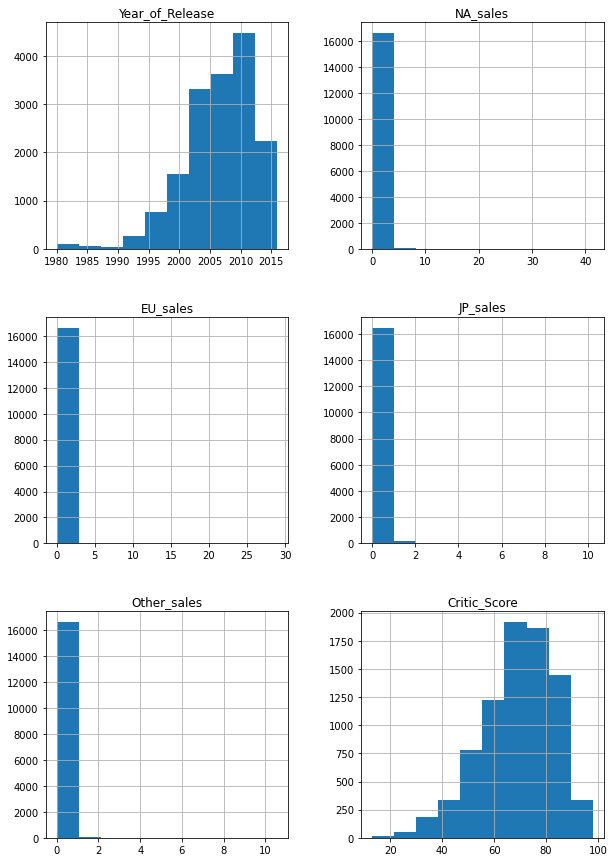

In [6]:
data.hist(figsize=(10, 15));

## Предобработка данных

### Замена названия столбцов (приведение к нижнему регистру)

Заменим названия столбцов, приведем их к нижнему регистру.

In [7]:
# выведем на экран названия столбцов
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
data = data.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', \
                            'Genre':'genre', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', \
                            'User_Score':'user_score', 'Rating':'rating'})

In [9]:
# check
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Удаление пропусков

Выведем количество пропущенных значений для каждого столбца.

In [10]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
# пропущенные значения бары
def pass_value_barh(data):
    try:
        (
            (data.isna().sum())
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 15)
            .set_title('Количество пропущенных значений в столбцах' + "\n", fontsize = 20, color = 'Black')    
        );    
    except:
        print('пропусков не осталось')

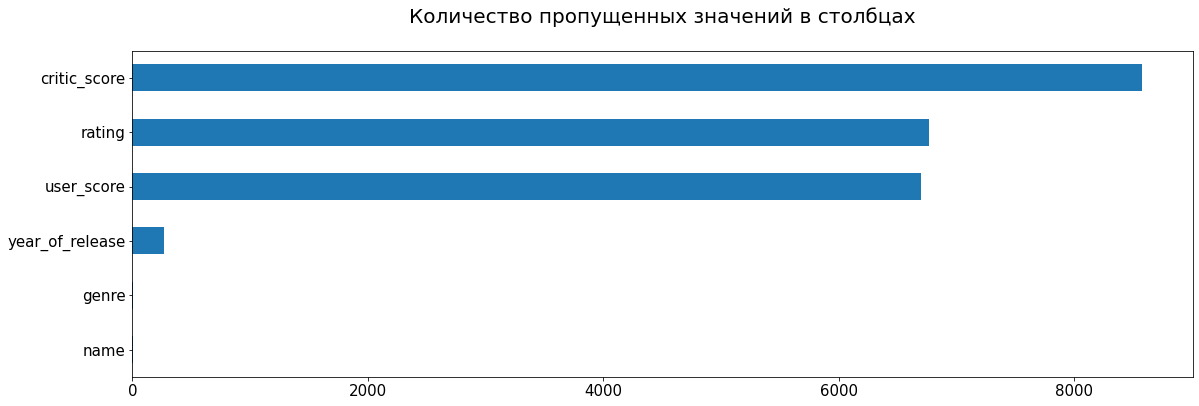

In [12]:
pass_value_barh(data)

Причиной возникновения пропусков в исходных данных может быть как человеческий, так и технический фактор.

Заполним пропущенные значения там, где это возможно. Для этого изучим каждый столбец в отдельности, посмотрим какие данные и в каком количестве они содержат. 

Обратим внимание на столбцы с минимальным количеством пропусков - это столбцы `name` - название игры, и `genre` - жанр игры. Восстановить эти данные нам не удастся. Удалим строки с пропусками в этих столбцах.

In [13]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
data.loc[data['genre'].isna()]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Одни и те же строки имеют пропуски в столбце "name" и "genre", удаление этих строк не повлияет на дальнейший анализ.

In [15]:
data = data.dropna(subset=['name', 'genre'])

Количество пропущенных значений в столбце `year_of_release` - 1,6%, такое количество пропусков не повлияет на дальнейшее исследование данных. Удалим строки с пропусками в этом столбце.

In [16]:
data = data.dropna(subset=['year_of_release'])

Исследуем данные в столбце `user_score`.

In [17]:
# выведем на экран все уникальные значения
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Все значения в столбце `user_score` относятся к типу - 'object'. Кроме пропущенных значений - 'nan', есть значения - 'tbd', что в переводе означает "подлежит уточнению". Заменим все значения 'tbd' на 'nan', чтобы в дальнейшем мы смогли проводить математические операции в этом столбце, а также преобразовать тип данных к float.

In [18]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')

In [19]:
# check
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [20]:
# check
data.user_score.isna().sum()

8981

Несмотря на большое количество пропущенных значений в столбце `user_score`, мы не будем заполнять их синтетическими данными, так как это может сильно исказить результаты исследования.

Исследуем данные в столбце `rating`.

In [21]:
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В столбце `rating` всего восемь различных категорий. 
- 'E' («Everyone») — «Для всех»;
- 'M' («Mature») — «Для взрослых»;
- 'T' («Teen») — «Подросткам»;
- 'E10+' («Everyone 10 and older») — «Для всех от 10 лет и старше»;
- 'K-A' ("Kids to Adults") - первоначальное название рейтинга 'E';
- 'AO' («Adults Only 18+») — «Только для взрослых»;
- 'EC' («Early childhood») — «Для детей младшего возраста»;
- 'RP' («Rating Pending») — «Рейтинг ожидается»

In [22]:
# посмотрим какое количетсво данных принадлежит к конкретной категории
data.rating.value_counts().to_frame()

,rating
E,3921
T,2905
M,1536
E10+,1393
EC,8
K-A,3
RP,1
AO,1


Категория 'K-A' - это старое название категории 'E', заменим категорию 'K-A' на 'E'. 

In [23]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

Категорию 'RP' - имеет только одно значение. Данная маркировка была введена с 2021 года, а наш исходный датафрейм содержит данные только до 2016 года. Удалим данные, содержащие категорию 'RP'.

In [24]:
data = data[(data['rating'] != 'RP')]

In [25]:
# check
data.rating.value_counts().to_frame()

,rating
E,3924
T,2905
M,1536
E10+,1393
EC,8
AO,1


Предположим, что пропущенные значения - это отсутствие возрастной категории, или эта категория не определена. Заменим пропущенные значения на 'no_rating'. 

In [26]:
data['rating'] = data['rating'].fillna('no_rating')

In [27]:
# check
data.rating.isna().sum()

0

Рассмотри данные в столбце `critic_score`.

In [28]:
data.critic_score.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [29]:
data.critic_score.isna().sum()

8461

В столбце `critic_score` большое количество пропущенных значений, но также как и для столбца `user_score`, мы не станем заполнять пропущенные значения синтетическими данными.

In [30]:
# check
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

### Изменение типов данных

In [31]:
# выведем информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   NA_sales         16443 non-null  float64
 5   EU_sales         16443 non-null  float64
 6   JP_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   object 
 10  rating           16443 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Столбец `year_of_release` - год выпуска, приведем к целочисленным значениям. 

In [32]:
data['year_of_release'] = data['year_of_release'].astype(int)

Столбец `user_score` - приведем к типу 'float', так как этот столбец стодержит вещественные числа, которые нам понадобятся для дальнейшего исследования.

In [33]:
data['user_score'] = data['user_score'].astype(float)

In [34]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   NA_sales         16443 non-null  float64
 5   EU_sales         16443 non-null  float64
 6   JP_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Добавление новых столбцов

Добавим новый столбец `total_sales`, который будет содержать суммарные продажи во всех регионах.

In [36]:
data['total_sales'] = data[['NA_sales', 'EU_sales', 'JP_sales', 'other_sales']].sum(axis = 1)

In [37]:
# check
data.head(10)

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_rating,28.31


На этапе предобработки данных, мы привели к нижнему регистру названия следующих столбцов: "name", "platform", "year_of_release", "genre", "other_sales", "critic_score", "user_score" и "rating". Удалили строки с пропущенными значениями в столбцах: "name", "genre" и "year_of_release". Обработали пропуски в столбце "rating". В столбце "user_score" заменили все значения 'tbd' на 'nan'. Изменили тип данных в столбце "year_of_release" и "user_score". Добавили новый столбец "total_sales", который хранит в себе сумму продаж по всем регионам.

## Исследовательский анализ данных

### Исследование о количестве игр, выпущенных в разные годы

Для подсчета количества игр, выпущенных в разные годы, создадим сводную таблицу `games_per_year` и сгруппируем данные по столбцу `year_of_release`. 

In [38]:
games_per_year = data.groupby(['year_of_release']).agg(games = ('name', 'count'))
games_per_year

,games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


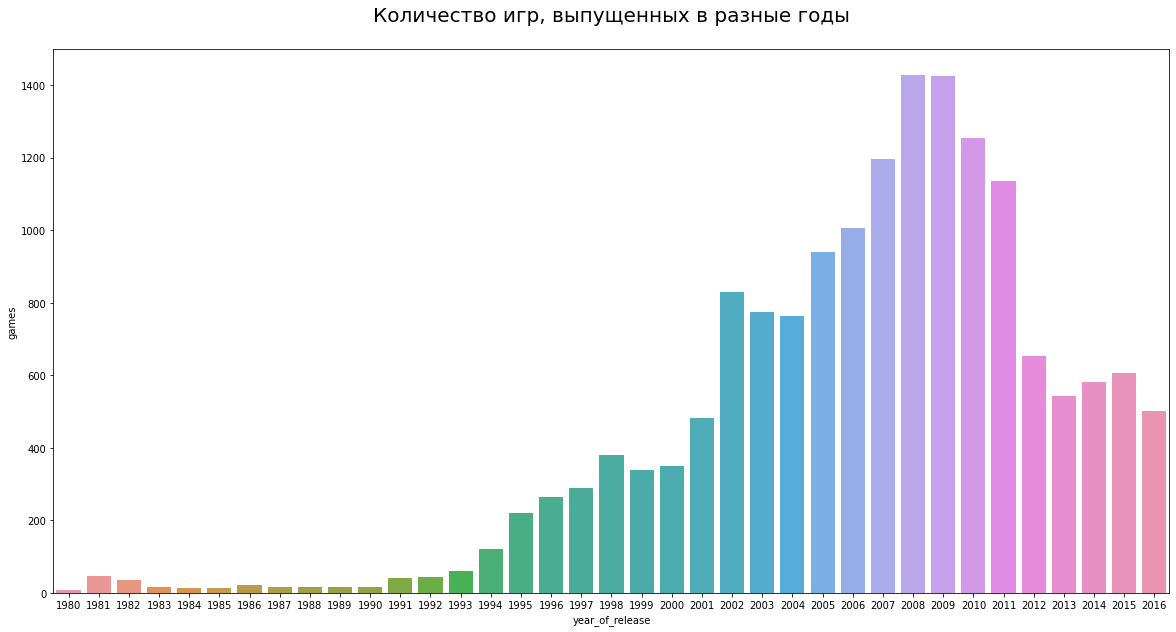

In [40]:
fig = plt.figure()

sns.barplot(x = games_per_year.index, y = games_per_year['games'])

plt.title('Количество игр, выпущенных в разные годы' + "\n", fontsize = 20, color = 'k')
plt.xlabel('');
plt.ylabel('Количество игр, шт');

fig.set_figwidth(20)   
fig.set_figheight(10) 

plt.show()

Количество игр, выпущенных в период с 1980-1993 очень мало и колеблется от 9 до 60 игр в год. В 1994 и 1995 году количество новых игр увеличивается в два раза, по сравнению с предыдущим годом. В период с 1996-2000 наблюдаем достаточно плавный рост количества выпускаемых игр. В 2001 году выпущенно 482 игры, а в 2002 году этот показатель вырос почти в два раза, и держится на этом уровне до 2004 года. С 2005-2009 наблюдается увеличение количества новых игр, а в 2008 и 2009 годах они достигают своих пиковых значений - более 1400 новых игр. В период с 2010-2016 количество выпущенных игр падает. В 2012 выпущено 653 игры - это в два раза меньше, по сравнению с 2011 годом. 

Для дальнейшего анализа стоит рассматривать период с 1994-2016 год, так как этот период охватывает большую динамику роста и падения количества выпускаемых игр.

### Исследование динамики продаж по платформам

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Исследуем динамику продаж по платформам, для этого выберем платформы с наибольшими суммарными продажами.

In [41]:
# создадим сводную таблицу 'total_sales_platform' и сгруппируем данные по столбцу 'platform'
total_sales_platform = (data.groupby(['platform']).agg(total_sales = ('total_sales', 'sum'))
                        .sort_values(by = 'total_sales', ascending = False))
total_sales_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


В полученной таблице выделяются первые шесть платформ с наибольшими суммарными продажами - 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'.

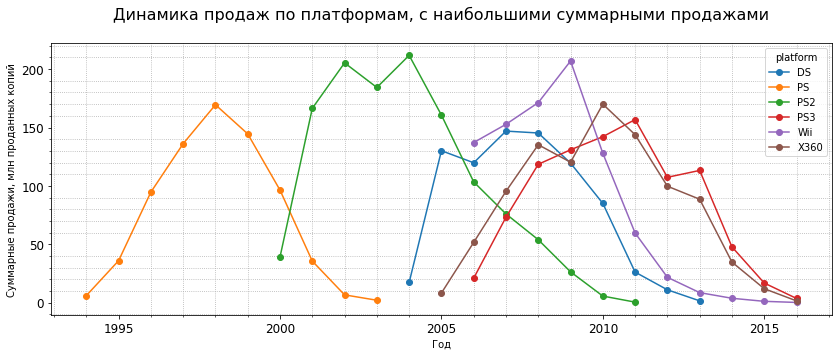

In [42]:
# построим распределение по годам и платформам с наибольшими суммарными продажами
top_platform = (data.groupby('platform')['total_sales']
                .sum()
                .sort_values(ascending = False)
                .head(6)
                .index)

(data.query('platform in @top_platform and year_of_release > 1993')
 .pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
 .plot(style = 'o-', figsize = (14, 5), fontsize = 12)
 .set_title('Динамика продаж по платформам, с наибольшими суммарными продажами' + "\n", fontsize = 16, color = 'k'));

plt.minorticks_on()
plt.grid(which='minor', color='#aaa', ls=':')

plt.xlabel('Год');
plt.ylabel('Суммарные продажи, млн проданных копий');

Рассмотрим динамику продаж каждой платформы в отдельности.

Платформа 'PS' - срок жизни этой платформы 9 лет, с 1994-2003, при этом первые 4 года наблюдается рост продаж, а последние 5 лет спад.

Платформа 'PS2' - период существования платформы 11 лет, с 2000-2011, как и в случае с 'PS' первые 4 года - рост продаж, остальной срок - постепенное их падение. 

Платформа 'DS' - срок жизни 8 лет, с 2004-2012, в первой половине жизни - рост, во второй - падение.

Платформа 'Wii' - период существования - 10 лет, с 2006-2016, первые 3 года продажи растут, остальное время продажи падают.

Платформа 'X360' - срок жизни 11 лет, с 2005-2016, первые 5 лет наблюдается рост, остальное время - падение.

Платформа 'PS3' - период существования 10 лет, с 2006-20016, в первой половине наблюдается рост продаж, во второй - падение.

Для платформы PlayStation отметим некую закономернось, новая версия 'PS' выходит каждые шесть лет. Когда продажи старой версии приближаются к 100 млн игр, выходит новая версия.

Средний срок существования игровой платформы 10 лет, при этом в первой половине - продажи растут, а вторую - падают. Обратим внимание, что большая часть платформ с наибольшими суммарными продажами существовали с 2004 по 2016 год. Также необходимо отметить, что эти платформы за первые два года сумели продать около 100 млн игр. Обазначим эту сумму, как некий рубеж, который будет характиризовать активную фазу жизни платформы. Мы помним, что самое большое количество игр продавалось в 2008-2009 году. Учитывая этот период и период с сумарными продажами более 100 млн проданных копий, с 2007 по 2012 наблюдается самая интенсивная динамика развития игровой индустрии. 

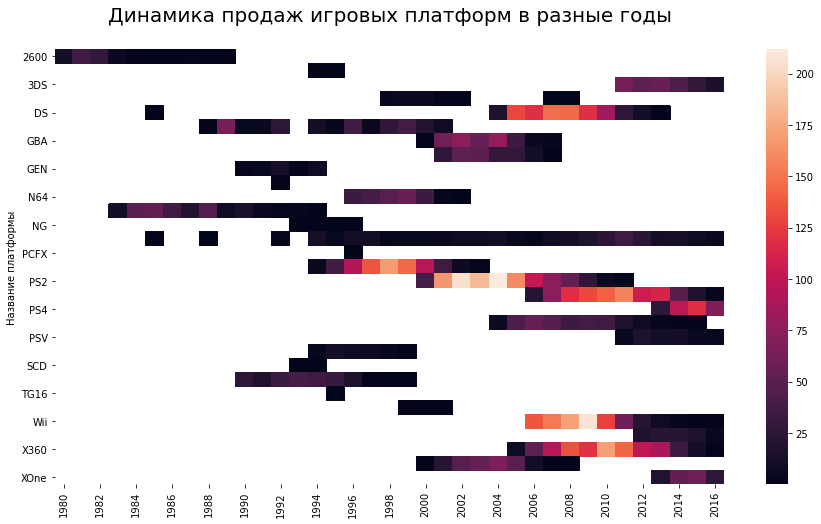

In [43]:
#heatmap plt.figure(figsize=(16, 6)) 
fig = plt.figure()

platforms_life = (data.pivot_table(
    index='platform', 
    columns='year_of_release', 
    values='total_sales', 
    aggfunc='sum'))

sns.heatmap(platforms_life);

plt.title('Динамика продаж игровых платформ в разные годы' + "\n", fontsize = 20, color = 'k')

plt.xlabel('');
plt.ylabel('Название платформы');

fig.set_figwidth(15)   
fig.set_figheight(8) 

plt.show()

За актуальный период возьмем последние 4 года, с 2012 по 2016 год, за этот период мы сможем увидеть платформы которые появились, а также те, которые начинают терять свою популярность.

In [46]:
actual = data[(data['year_of_release'] > 2011)]

In [47]:
# check
actual.head(10)

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


Для дальнейшего исследования будем использовать данные за актуальный период.

### Исследование платформ по продажам

Исследуем платформы за актуальный период.

In [48]:
# создадим сводную таблицу 'actual_platform' и сгруппируем данные по столбцу 'platform'
actual_platform = (actual.groupby(['platform']).agg(total_sales = ('total_sales', 'sum'))
                   .sort_values(by = 'total_sales', ascending = False))
actual_platform

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Количество платформ за актуальный период сократилось до 11.

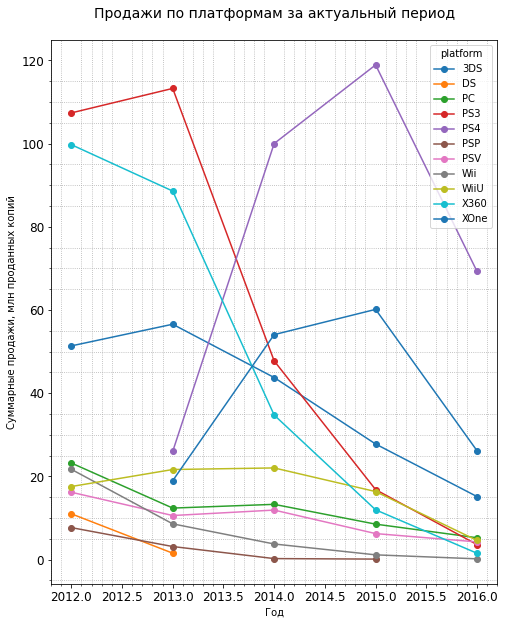

In [49]:
# построим график продаж по платформам
(actual
 .pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
 .plot(style = 'o-', figsize = (8, 10), fontsize = 12)
 .set_title('Продажи по платформам за актуальный период' + "\n", fontsize = 14, color = 'k'));
plt.minorticks_on()
plt.grid(which='minor', color='#aaa', ls=':')
plt.xlabel('Год');
plt.ylabel('Суммарные продажи, млн проданных копий');
plt.show()

На графике можно выделить платформы, которые перестали существовать к концу 2016. Это платформы 'DS' и 'PSP'. Плтаформы 'Wii', 'PSV', 'PC' и 'WiiU' на протяжении всего актуального периода постепенно теряли свою популярность. Продажи платформы 'Wii' к концу 2016 года приблизились к нулю, а продажи платформ 'PSV', 'PC' и 'WiiU' к концу 2016 колеблятся около 5 млн проданных копий. На графике мы также можем увидеть, что платформы 'PS3' и 'X360' преодолели свои пиковые значения, и в течение актуального периода их продажи резко снижались, а к концу 2016 их продажи и вовсе начали колебаться около 5 млн проданных копий. Платформа '3DS' теряет свою популярность, и ее продажи с 50 млн упали до 15 млн продаж. Платформы 'PS4' и 'XOne' появились в 2013 году, а это значит, что их продажи еще могут вырасти, поэтому эти платформы можно считать потенциально прибыльными. Самой перспективной платформой выглядит 'PS4', так как она является лидером продаж - 314 млн проданных копий за первые три года своего существования.

### Исследование графика «ящик с усами» по глобальным продажам игр в разбивке по платформам

Для дальнейшего исследования "графика с усами", выделим платформы за актуальный период с глобальными продажами игр. Это платформы 'PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV' и 'Wii'.

In [50]:
# создадим таблицу 'actual_total_sales'
actual_total_sales = (actual[['platform', 'total_sales']]
                      .query('platform in ["PS4", "PS3", "X360", "3DS", "XOne", "WiiU", "PC", "PSV", "Wii"]'))
actual_total_sales.head(10)

,platform,total_sales
16,PS3,21.05
23,X360,16.27
31,PS4,14.63
33,3DS,14.60
34,PS3,13.79
35,X360,13.68
42,PS4,12.62
47,3DS,11.68
60,X360,10.24
62,3DS,9.90


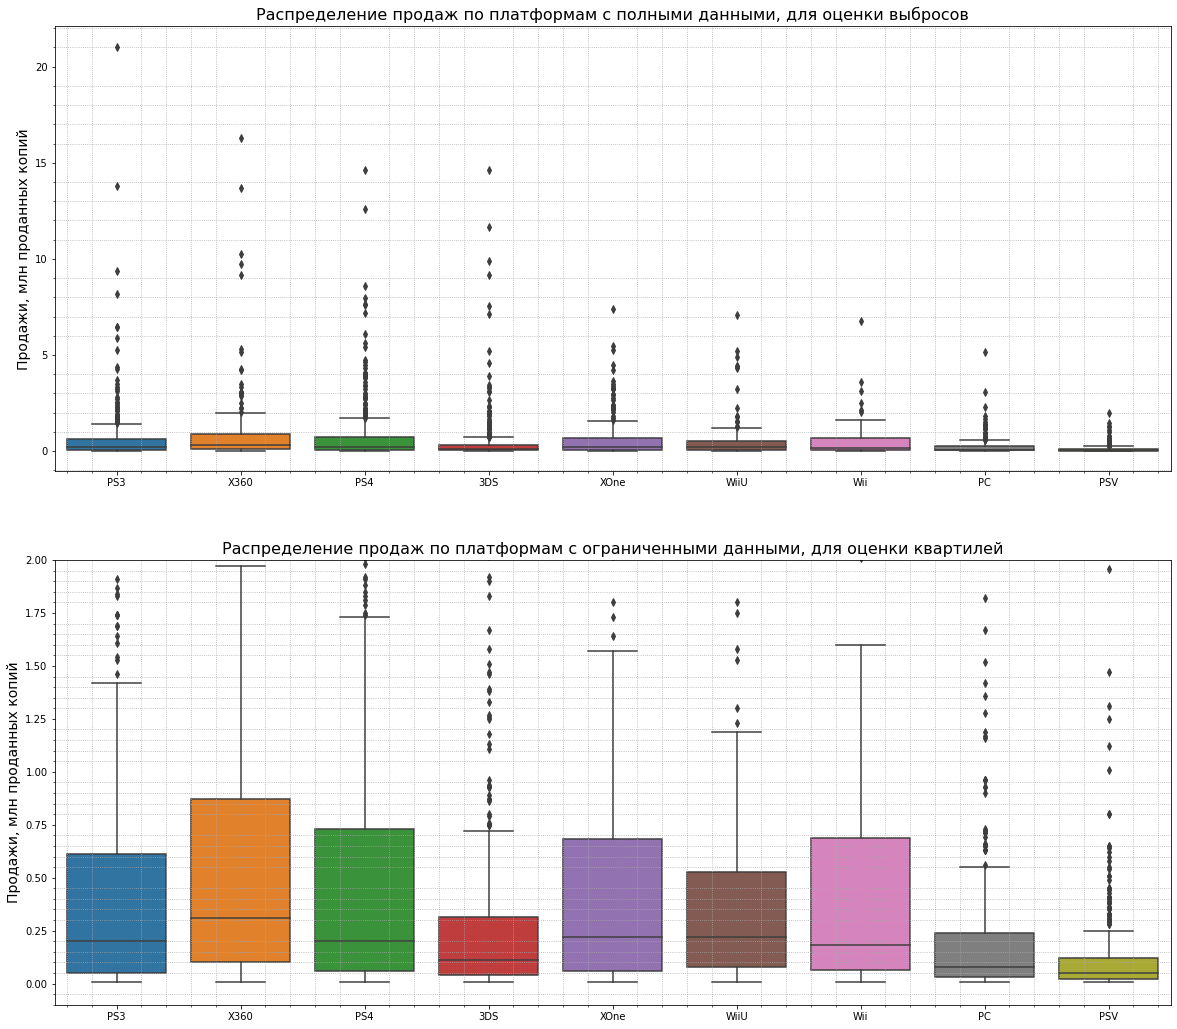

In [52]:
# построим диаграмму размаха для следующих платформ - 'PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii'

# устанавливаем размер фируры
plt.figure(figsize=(20, 18))

# создаем подграфики с 2 строками, 1 столбцом и начальным графиком 1
plt.subplot(2, 1, 1)
sns.boxplot(x = actual_total_sales['platform'], y = actual_total_sales['total_sales']);

plt.minorticks_on()
plt.grid(which='minor', color='#aaa', ls=':')

plt.xlabel('')
plt.ylabel("Продажи, млн проданных копий", fontsize = 14)
plt.title("Распределение продаж по платформам с полными данными, для оценки выбросов", fontsize = 16);

# создаем подграфик 2
plt.subplot(2, 1, 2)
sns.boxplot(x = actual_total_sales['platform'], y = actual_total_sales['total_sales']);

plt.minorticks_on()
plt.grid(which='minor', color='#aaa', ls=':')

plt.xlabel('')
plt.ylabel("Продажи, млн проданных копий", fontsize = 14)
plt.ylim(-0.1, 2.0);
plt.title("Распределение продаж по платформам с ограниченными данными, для оценки квартилей", fontsize = 16);

Рассмотрим график распределения продаж по платформам с полными данными. Платформы 'PS3', 'X360', 'PS4' и '3DS' имеют достаточно большой диапазон выбросов, особенно выделяются экстремальные выбросы, это мегапопулярные игры, чьи продажи достигали более 8 млн проданных копий. У платформ 'Xone', 'WiiU', 'Wii' и 'PC' - не такое большой диапазон выбросов, но мы можем отметить, что на этих платформах были популярные игры, чьи продажи достигали более 4 млн проданных копий. У платформа 'PSV' можем выделить игру, чья продажа достигла 2 млн проданных копий.<br />  
        
Исследуем график распределения продаж по платформам с ограниченными данными. Заметим, что "нижний ус" у всех платформ ограничен минимумом продаж - 0. Также, стоит отметить, что медиана у всех платформ ближе к нижнему квартилю, это значит, что плотность распределения игр с небольшими продажами выше, иными словами на платформах преобладают игры с маленькими продажами.<br />
        
У платформы 'X360' самый широкий размах - от 100 до 870 тыс продаж. У игровых платформ 'PS3', 'PS4', 'Xone' и 'Wii' большая часть продаж находится в диапазоне от 50 тыс до 600-730 тыс проданных копий. Большая часть продаж платформы 'WiiU' находится в диапазоне от 80 до 270 тыс копий. Основные продажи у платформ '3DS' и 'PC' находятся в диапазоне от 50 до 250-320 тыс проданных копий. Самый узкий диапазон основных продаж находится у платформы 'PSV' от нескольких тысяч до 120 тыс копий.

### Исследование влияния отзывов на продажи внутри платформы 

#### Влияние отзывов на продажи внутри платформы 'PS3'

Исследуем как оценки критиков и пользователей влияют на уровень продаж платформы 'PS3'. Для этого построим диаграмму рассеяния и посчитаем коэффициент корреляции Пирсона.

0.3314972592629587

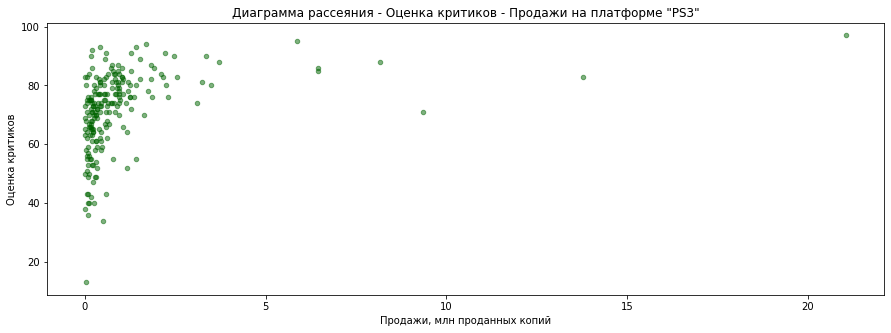

In [53]:
# сделаем срез данных для платформы 'PS3' и сохраним их в переменной 'ps3_score'
ps3_score = actual.query('platform == "PS3"')
ps3_score.plot(kind='scatter', x='total_sales', y='critic_score', alpha=0.5, figsize=(15, 5), c='darkgreen');
plt.title('Диаграмма рассеяния - Оценка критиков - Продажи на платформе "PS3"');
plt.xlabel('Продажи, млн проданных копий');
plt.ylabel('Оценка критиков');
ps3_score['total_sales'].corr(ps3_score['critic_score'])

Коэффициент корреляции равен 0,33. Такое значение коэффициента говорит об умеренной связи между оценкой критиков и уровнем продаж на платформе. Чем выше оценка критиков, тем выше уровень продаж на платформе.

-0.005143522887113828

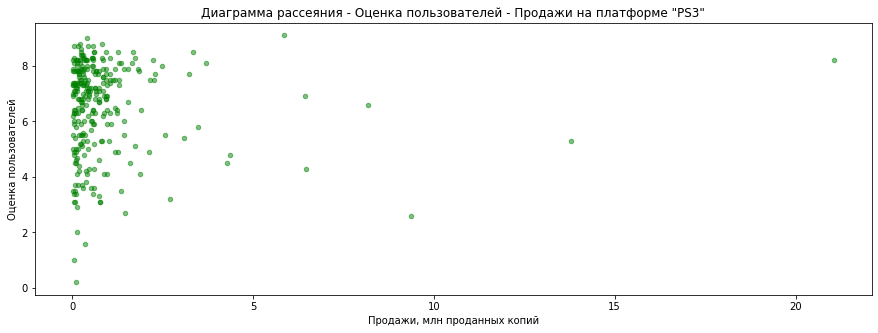

In [54]:
ps3_score.plot(kind='scatter', x='total_sales', y='user_score', alpha=0.5, figsize=(15, 5),c='g');
plt.title('Диаграмма рассеяния - Оценка пользователей - Продажи на платформе "PS3"');
plt.xlabel('Продажи, млн проданных копий');
plt.ylabel('Оценка пользователей');
ps3_score['total_sales'].corr(ps3_score['user_score'])

Коэффициент корреляции равен 0. Такое значение коэффициента говорит об отсутствии связи между оценкой пользователей и уровнем продаж на платформе.

#### Влияние отзывов на продажи внутри платформы 'X360'

Построим диаграмму рассеяния продаж для популярной платформы 'X360'.

0.36057348885073365

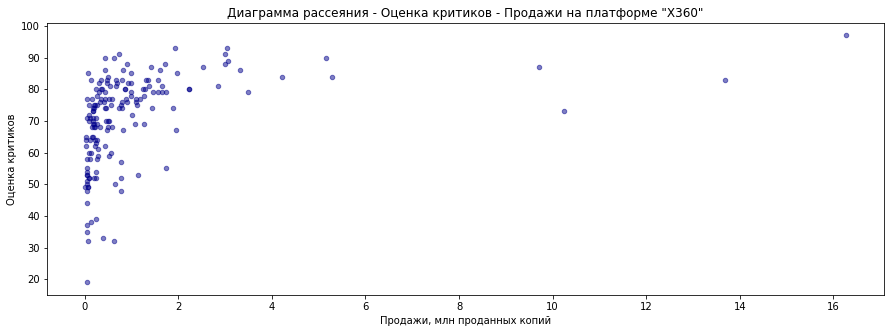

In [55]:
# сделаем срез данных для платформы 'X360' и сохраним их в переменной 'x360_score'
x360_score = actual[actual['platform'] == "X360"]
x360_score.plot(kind='scatter', x='total_sales', y='critic_score', alpha=0.5, figsize=(15, 5), c='darkblue');
plt.title('Диаграмма рассеяния - Оценка критиков - Продажи на платформе "X360"');
plt.xlabel('Продажи, млн проданных копий');
plt.ylabel('Оценка критиков');
x360_score['total_sales'].corr(x360_score['critic_score'])

Коэффициент корреляции равен 0,36. Такое значение коэффициента говорит об умеренной связи между оценкой критиков и уровнем продаж на платформе. Чем выше оценка критиков, тем выше уровень продаж на платформе.

0.0061639786462133256

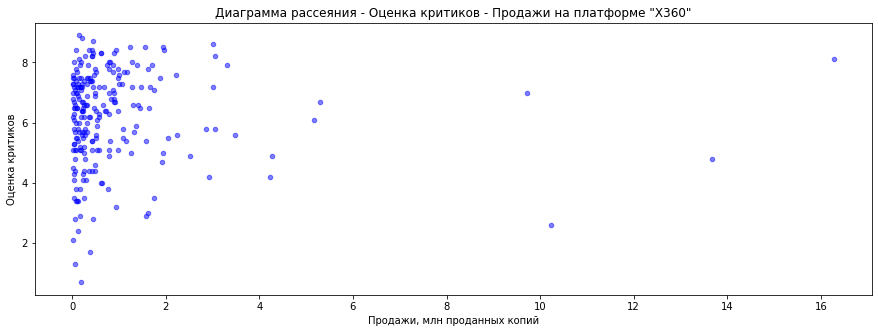

In [56]:
x360_score.plot(kind='scatter', x='total_sales', y='user_score', alpha=0.5, figsize=(15, 5), c='b');
plt.title('Диаграмма рассеяния - Оценка критиков - Продажи на платформе "X360"');
plt.xlabel('Продажи, млн проданных копий');
plt.ylabel('Оценка критиков');
x360_score['total_sales'].corr(x360_score['user_score'])

Коэффициент корреляции равен 0. Такое значение коэффициента говорит об отсутствии связи между оценкой пользователей и уровнем продаж на платформе.

#### Влияние отзывов на продажи внутри платформы 'PS4'

Исследуем зависимость между отзывами и продажами на платформе 'PS4'.

0.406567902061781

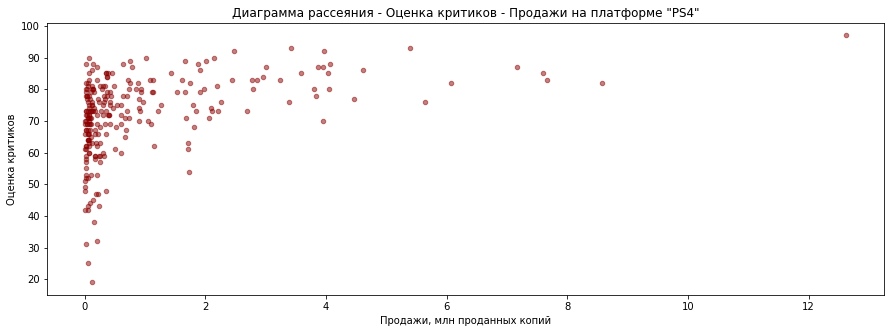

In [57]:
# сделаем срез данных для платформы 'PS4' и сохраним их в переменной 'ps4_score'
ps4_score = actual[actual['platform'] == "PS4"]
ps4_score.plot(kind='scatter', x='total_sales', y='critic_score', alpha=0.5, figsize=(15, 5), c='darkred');
plt.title('Диаграмма рассеяния - Оценка критиков - Продажи на платформе "PS4"');
plt.xlabel('Продажи, млн проданных копий');
plt.ylabel('Оценка критиков');
ps4_score['total_sales'].corr(ps4_score['critic_score'])

Коэффициент корреляции равен 0,41. Такое значение коэффициента говорит о наличии умеренной связи между оценкой критиков и уровнем продаж на платформе. Чем выше оценка критиков, тем выше уровень продаж на платформе, но так может быть не всегда.

-0.031957110204556376

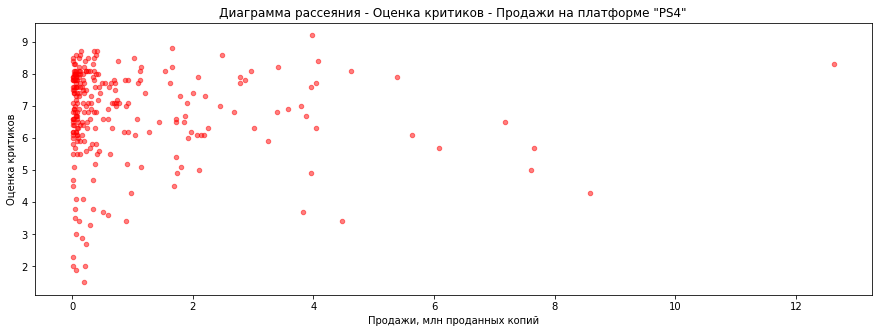

In [58]:
ps4_score.plot(kind='scatter', x='total_sales', y='user_score', alpha=0.5, figsize=(15, 5), c='red');
plt.title('Диаграмма рассеяния - Оценка критиков - Продажи на платформе "PS4"');
plt.xlabel('Продажи, млн проданных копий');
plt.ylabel('Оценка критиков');
ps4_score['total_sales'].corr(ps4_score['user_score'])

Коэффициент корреляции равен 0. Такое значение коэффициента говорит об отсутствии связи между оценкой пользователей и уровнем продаж на платформе.

####  Влияние отзывов на продажи внутри платформы '3DS'

Построим диаграмму рассеяния продаж для платформы '3DS'.

0.32080286953607845

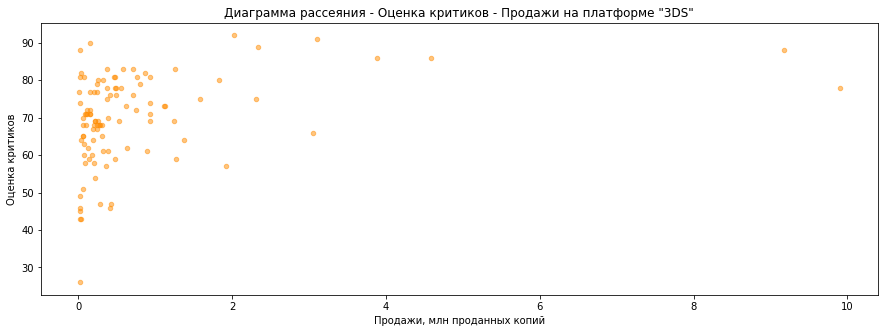

In [59]:
# сделаем срез данных для платформы '3DS' и сохраним их в переменной 'three_ds_score'
three_ds_score = actual[actual['platform'] == "3DS"]
three_ds_score.plot(kind='scatter', x='total_sales', y='critic_score', alpha=0.5, figsize=(15, 5), c='darkorange');
plt.title('Диаграмма рассеяния - Оценка критиков - Продажи на платформе "3DS"');
plt.xlabel('Продажи, млн проданных копий');
plt.ylabel('Оценка критиков');
three_ds_score['total_sales'].corr(three_ds_score['critic_score'])

Коэффициент корреляции равен 0,32. Такое значение коэффициента говорит об умеренной связи между оценкой критиков и уровнем продаж на платформе. Чем выше оценка критиков, тем выше уровень продаж на платформе, но так может быть не всегда.

0.19758263411038596

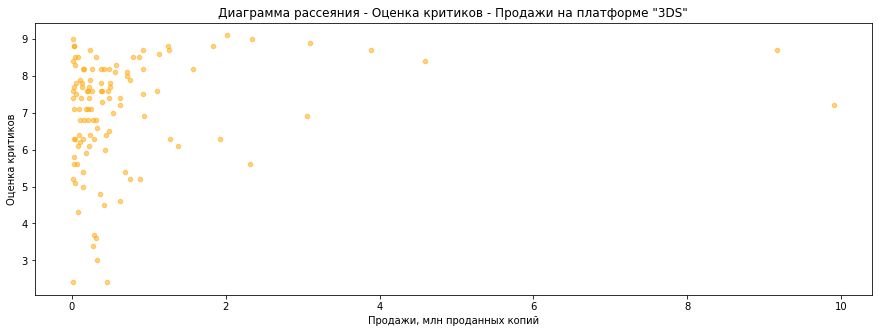

In [60]:
three_ds_score.plot(kind='scatter', x='total_sales', y='user_score', alpha=0.5, figsize=(15, 5), c='orange');
plt.title('Диаграмма рассеяния - Оценка критиков - Продажи на платформе "3DS"');
plt.xlabel('Продажи, млн проданных копий');
plt.ylabel('Оценка критиков');
three_ds_score['total_sales'].corr(three_ds_score['user_score'])

Коэффициент корреляции равен 0,20. Такое значение коэффициента говорит о слабой связи между оценкой пользователей и уровнем продаж на платформе.

**Вывод:** отзывы критиков влияют на уровень продаж на платформе, чем выше оценка, тем выше уровень продаж. Оценки пользователей не влияют на уровень продаж на платформе.

### Исследование распределения игр по жанрам

Исследуем распределение игр по жанрам. Для этого построим сводную таблицу 'genre_distr'.

In [61]:
genre_distr = (actual.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum'])
                       .sort_values(by=('count', 'total_sales'), ascending = False))
# дадим новые названия столбцов нашей сводной таблице:
# 'count_genre' - количество игр данного жанра
# 'total_sales_genre' - количество проданных копий данного жанра  
genre_distr.columns = ['count_genre', 'total_sales_genre']
genre_distr

,count_genre,total_sales_genre
genre,,
Action,1031,441.12
Role-Playing,370,192.80
Adventure,302,29.43
Sports,268,181.07
Shooter,235,304.73
Misc,192,85.04
Racing,115,53.50
Fighting,109,44.49
Platform,85,61.00


Визуализируем данные на графике.

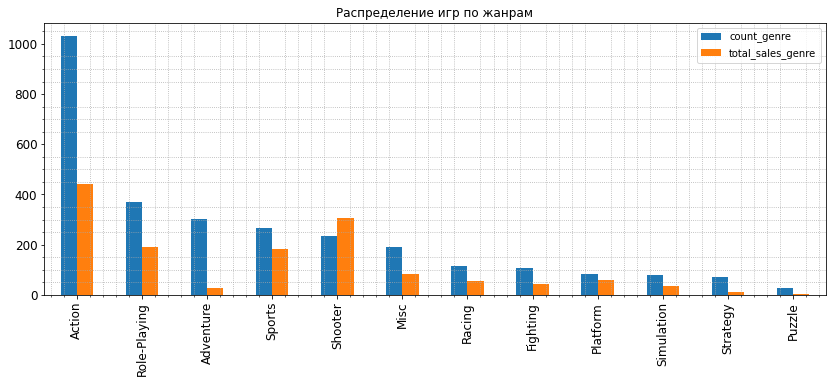

In [62]:
genre_distr.reset_index()
genre_distr.plot(kind='bar', figsize = (14, 5), legend = True, fontsize = 12);
plt.minorticks_on()
plt.grid(which='minor', color='#aaa', ls=':')
plt.title('Распределение игр по жанрам');
plt.ylabel('');
plt.xlabel('');

Самые прибыльные жанры - 'Action', 'Sports', 'Shooter'. Самое большое количество жанров среди игр - 'Action', 'Misc', 'Sports'. На графике выделяются жанры с самыми низкими продажами - это 'Strategy', 'Puzzle' и 'Adventure'.

Построим сводную таблицу, которая будет содержать общее количество игр каждого жанра и их средние продажи за актуальный период.

In [63]:
genre_distr_mean = (actual.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'mean'])
                       .sort_values(by=('count', 'total_sales'), ascending = False))
# дадим новые названия столбцов нашей сводной таблице:
# 'count_genre' - количество игр данного жанра
# 'mean_sales_genre' - среднее количество проданных копий данного жанра  
genre_distr_mean.columns = ['count_genre', 'mean_sales_genre']
genre_distr_mean

,count_genre,mean_sales_genre
genre,,
Action,1031,0.427856
Role-Playing,370,0.521081
Adventure,302,0.097450
Sports,268,0.675634
Shooter,235,1.296723
Misc,192,0.442917
Racing,115,0.465217
Fighting,109,0.408165
Platform,85,0.717647


Значения столбца 'mean_sales_genre', очень маленькие, так как продажи исчислялись в млн. Для того, чтобы увидеть соотношение между количеством игр определенного жанра и их средней стоимостью, переведем значения столбца 'mean_sales_genre' в тысячи проданных копий. Для этого столбец 'mean_sales_genre' умножим на тысячу.

In [64]:
genre_distr_mean['mean_sales_genre'] = genre_distr_mean['mean_sales_genre']*1000

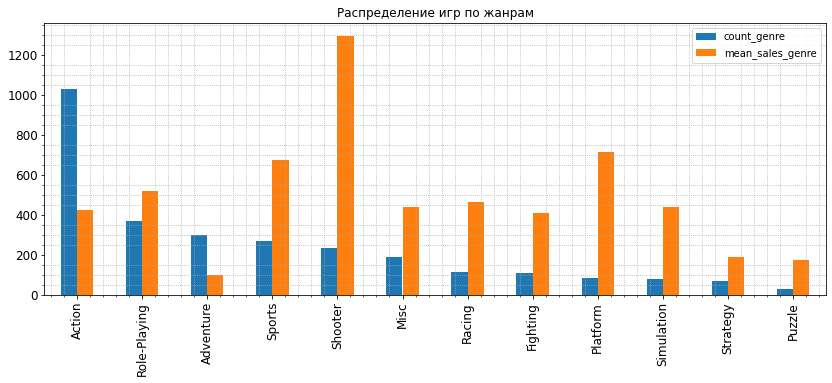

In [65]:
genre_distr_mean.reset_index()
genre_distr_mean.plot(kind='bar', figsize = (14, 5), legend = True, fontsize = 12);
plt.minorticks_on()
plt.grid(which='minor', color='#aaa', ls=':')
plt.title('Распределение игр по жанрам');
plt.ylabel('');
plt.xlabel('');

На графике выделяются средние продажи жанра "Shooter" - несмотря на небольшое количество игр, средние продажи этого жанра достигают более 1 млн проданных копий. Также стоит отметить жанр "Platform" - количество игр этого жанра менее 100 шт, а средние продажи составляют более 700 тыс проданных копий. Игры, с такими жанрами как "Simulation", "Fighting" и "Racing" также приносят высокие доходы игровым платформам, несмотря на их небольшое количество. Такие жанры как "Action" и "Adventure", напротив, имеют большое количество игр, но приносят небольшие продажи. Жанры "Sports" и "Misc" сохраняют некий баланс между их количеством их средними продажами.

### Исследование портрета пользователя в Северной Америке, Европе и Японии

#### Самые популярные платформы (топ-5)

Для исследования самых популярных платформ, построим сводные таблицы для каждого региона и сравним их между собой. Также необходимо посчитать какую долю продаж составляет каждая платформа в отдельно взятом регионе.

Для того, чтобы посчитать долю продаж, нам необходимо узнать общую сумму всех продаж в каждом регионе - Северной Америке, Европе и Японии.

In [66]:
# общую сумму всех продаж в Северной Америке сохраним в переменной 'total_sum_NA'
total_sum_NA = actual.NA_sales.sum()
# общую сумму всех продаж в Европе сохраним в переменной 'total_sum_EU'
total_sum_EU = actual.EU_sales.sum()
# общую сумму всех продаж в Японии сохраним в переменной 'total_sum_JP'
total_sum_JP = actual.JP_sales.sum()

##### ТОП-5 игровых платформ Северной Америки

Изучим топ-5 самых популярных платформ в Северной Америке.

In [67]:
# построим сводную таблицу 'топ-5' самых популярных платформ для Северной Америки
top_platform_NA = (actual.pivot_table(index=['platform'], values='NA_sales', aggfunc=['sum'])
                   .sort_values(by=('sum', 'NA_sales'), ascending = False)
                   .head())
# добавим к таблице столбец 'sales_share', в котором сохраним значения доли продаж
top_platform_NA['sales_share'] = top_platform_NA['sum', 'NA_sales'] * 100 / total_sum_NA
# переименуем названия столбцов
top_platform_NA.columns = ['NA_sales_sum', 'sales_share']
# округлим значения столбцов до двух знаков после запятой
top_platform_NA.style.format({'sales_share' : "{:,.2f}", 'NA_sales_sum' : "{:,.2f}"})

,NA_sales_sum,sales_share
platform,,
X360,140.05,23.70
PS4,108.74,18.40
PS3,103.38,17.49
XOne,93.12,15.76
3DS,55.31,9.36


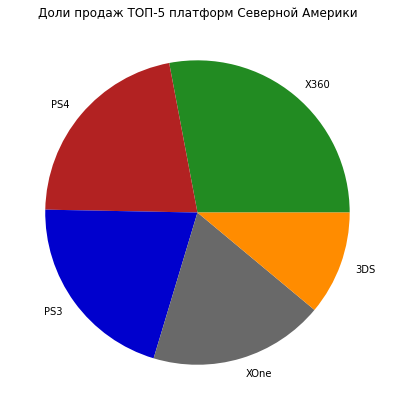

In [68]:
# визуализируем топ-5 платформ Северной Америки
top_NA = top_platform_NA.groupby('platform')['sales_share'].sum().sort_values(ascending = False)

top_NA.plot(kind='pie', subplots=True, figsize=(7, 7), counterclock=True, \
            colors=['forestgreen', 'firebrick', 'mediumblue', 'dimgrey', 'darkorange'])
plt.title('Доли продаж ТОП-5 платформ Северной Америки')
plt.ylabel('')
plt.show()

**Вывод:** самая популярная платформа в Северной Америке - платформа 'X360' - доля продаж на этой платформе составляет 23.70% от общих продаж. 

Второе место по популярности занимает игровая платформа 'PS4' - доля продаж - 18.40%. Разница между продажами 'X360' и 'PS4' - небольшая - всего 5.30%. 

На третьем месте платформа 'PS3' - 17.49%. Разница между вторым и четвертым местом - 0.91%.

На четвертом месте 'Xone' - 15.76%. Разница между третьим и четвертым местом - небольшая - 1.73%. Стоит отметить, что платформы 'PS4', 'PS3' и 'Xone' фактически делят между собой второую строчку рейтинга. 

Пятую строчку рейтинга занимает платформа '3DS' - 9.36%.

##### ТОП-5 игровых платформ Европы

Узнаем ТОП-5 самых популярных игровых платформ в Европе.

In [69]:
# построим сводную таблицу 'топ-5' самых популярных платформ для Европы
top_platform_EU = (actual.pivot_table(index=['platform'], values='EU_sales', aggfunc=['sum'])
                   .sort_values(by=('sum', 'EU_sales'), ascending = False)
                   .head())
# добавим к таблице столбец 'sales_share', в котором сохраним значения доли продаж
top_platform_EU['sales_share'] = top_platform_EU['sum', 'EU_sales'] * 100 / total_sum_EU
# переименуем названия столбцов
top_platform_EU.columns = ['EU_sales_sum', 'sales_share']
# округлим значения столбцов до двух знаков после запятой
top_platform_EU.style.format({'sales_share' : "{:,.2f}", 'EU_sales_sum' : "{:,.2f}"})

,EU_sales_sum,sales_share
platform,,
PS4,141.09,27.84
PS3,106.86,21.08
X360,74.52,14.70
XOne,51.59,10.18
3DS,42.64,8.41


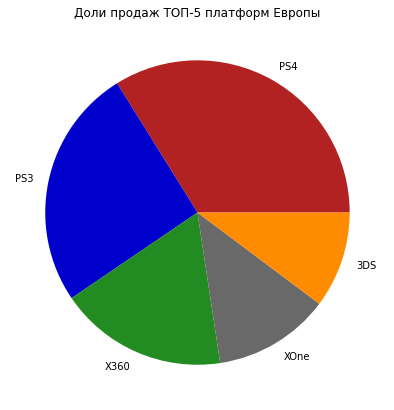

In [70]:
# визуализируем топ-5 платформ Европы
top_EU = top_platform_EU.groupby('platform')['sales_share'].sum().sort_values(ascending = False)

top_EU.plot(kind='pie', subplots=True, figsize=(7, 7), \
            colors=['firebrick', 'mediumblue', 'forestgreen', 'dimgrey', 'darkorange'])

plt.title('Доли продаж ТОП-5 платформ Европы')
plt.ylabel('')
plt.show()

**Вывод:** самая популярная платформа в Европе - платформа 'PS4' - доля продаж на этой платформе составляет 27.84% от общих продаж. 

Второе место по популярности занимает игровая платформа 'PS3' - доля продаж - 21.08%. 

На третьем месте платформа 'X360' - 14.70%. 

На четвертом месте 'XOne' - 10.18%. 

Пятую строчку рейтинга занимает '3DS' - всего 8.41%. Разница между четвертой и пятой строчкой рейтинга небольшая - 1.77%. Фактически платформы 'XOne' и '3DS' делят между собой четвертую строчку рейтинга.

##### ТОП-5 игровых платформ Японии

Изучим ТОП-5 самых популярных платформ Японии.

In [71]:
# построим сводную таблицу 'топ-5' самых популярных платформ для Японии
top_platform_JP = (actual.pivot_table(index=['platform'], values='JP_sales', aggfunc=['sum'])
                   .sort_values(by=('sum', 'JP_sales'), ascending = False)
                   .head(5))
# добавим к таблице столбец 'sales_share', в котором сохраним значения доли продаж
top_platform_JP['sales_share'] = top_platform_JP['sum', 'JP_sales'] * 100 / total_sum_JP
# переименуем названия столбцов
top_platform_JP.columns = ['JP_sales_sum', 'sales_share']
# округлим значения столбцов до двух знаков после запятой
top_platform_JP.style.format({'sales_share' : "{:,.2f}", 'JP_sales_sum' : "{:,.2f}"})

,JP_sales_sum,sales_share
platform,,
3DS,87.79,45.59
PS3,35.29,18.32
PSV,21.04,10.93
PS4,15.96,8.29
WiiU,13.01,6.76


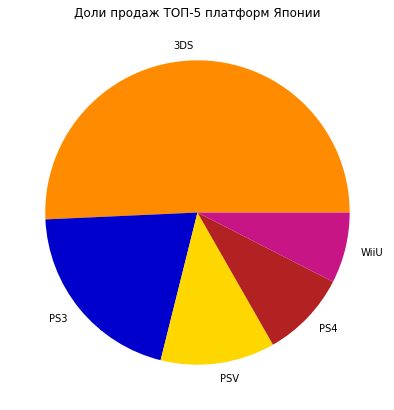

In [72]:
# визуализируем топ-5 платформ Японии
top_JP = top_platform_JP.groupby('platform')['sales_share'].sum().sort_values(ascending = False)

top_JP.plot(kind='pie', subplots=True, figsize=(7, 7), \
            colors=['darkorange', 'mediumblue', 'gold', 'firebrick', 'mediumvioletred'])

plt.title('Доли продаж ТОП-5 платформ Японии')
plt.ylabel('')
plt.show()

**Вывод:** самая популярная платформа в Японии - платформа '3DS' - доля продаж на этой платформе составляет 45.59% от общих продаж. 

Второе место по популярности занимает игровая платформа 'PS3' - доля продаж составляет 18.32%. Разница между первым и вторым местом большая - 27.27%.

На третьем месте платформа 'PSV' - 10.93%. 

На четвертом месте 'PS4' - 8.29%.

Пятую строчку рейтинга занимает 'WiiU' - 9.46%.

##### Сравнительная характеристика ТОП-5 платформ Северной Америки, Европы и Японии

Сравним ТОП-5 платформ между регионами.

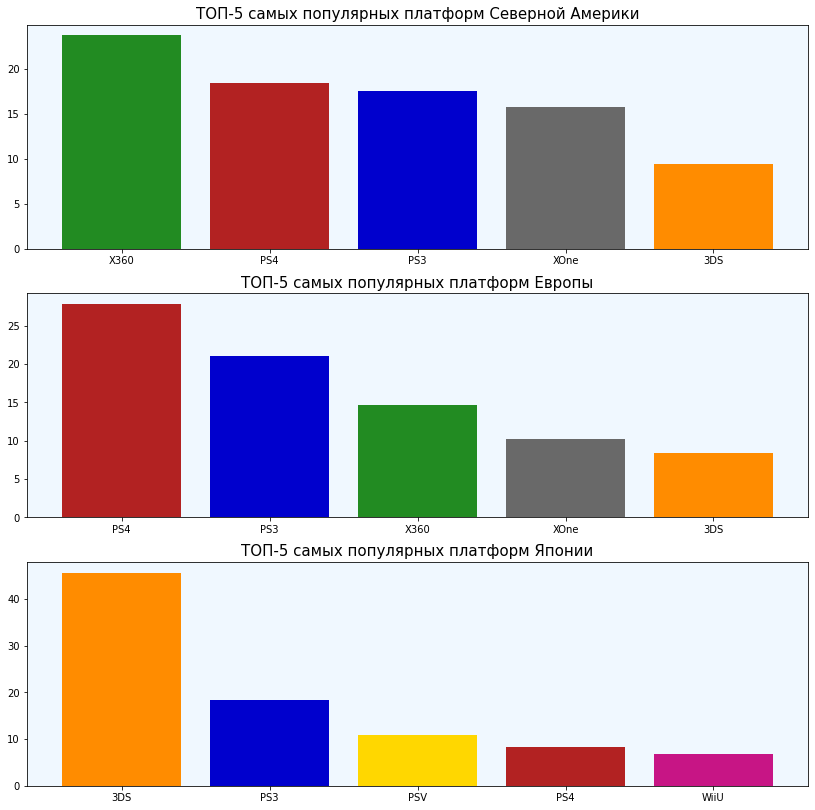

In [73]:
# передадим список платформ в Северной Америке в переменную 'x1'
x1 = top_NA.index
y1 = top_platform_NA['sales_share']
# передадим список цветов, который мы уже использовали при построении круговой диаграммы
color_1 = ['forestgreen', 'firebrick', 'mediumblue', 'dimgrey', 'darkorange']

# передадим список платформ в Европе в переменную 'x2'
x2 = top_EU.index
y2 = top_platform_EU['sales_share']
# передадим список цветов, который мы уже использовали при построении круговой диаграммы
color_2 = ['firebrick', 'mediumblue', 'forestgreen', 'dimgrey', 'darkorange']

# передадим список платформ в Японии в переменную 'x3'
x3 = top_JP.index
y3 = top_platform_JP['sales_share']
# передадим список цветов, который мы уже использовали при построении круговой диаграммы
color_3 = ['darkorange', 'mediumblue', 'gold', 'firebrick', 'mediumvioletred']

fig, axes = plt.subplots(3, 1)

axes[0].bar(x1, y1, color = color_1)
axes[1].bar(x2, y2, color = color_2)
axes[2].bar(x3, y3, color = color_3)

axes[0].set_title('ТОП-5 самых популярных платформ Северной Америки', fontsize = 15)
axes[1].set_title('ТОП-5 самых популярных платформ Европы', fontsize = 15)
axes[2].set_title('ТОП-5 самых популярных платформ Японии', fontsize = 15)

axes[0].set_facecolor('aliceblue')
axes[1].set_facecolor('aliceblue')
axes[2].set_facecolor('aliceblue')


fig.set_figwidth(14)   
fig.set_figheight(14)    


plt.show()

В Северной Америке и Европе список ТОП-5 платформ одинаковый. Самые популярные платформы Северной Америки, также входят в список популярных платформ в Европе. Это платформы 'X360', 'PS4', 'PS3', 'Xone' и '3DS'. В Северной Америке самая популярная платформа 'X360', а в Европе - 'PS4'. Платформы 'XOne' и 'DS' занимают четвертую строчку и пятую строчку соответственно, как в Северной Америке, так и Европе. Платформа 'PS3' занимает третью строчку в Северной Америке, а в Европе - вторую. 

В Японии список популярных платформ отличается от списка Америки и Европы. Самая популярная платформа в Японии - игровая платформа '3DS'. Платформа 'PS3' занимает вторую строчку рейтинга, также как и в Европе. Одна из самых популярных платформ Северной Америки и Европы 'PS4' занимает в Японии четвертую строчку рейтинга. Пятую строчку занимает платформа 'WiiU'.

#### Самые популярные жанры (топ-5)

Исследуем самые популярные жанры игр в Северной Америке, Европе и Японии.

##### ТОП-5 популярных жанров Северной Америки

Изучим самые популярные жанры Северной Америки.

In [74]:
# построим сводную таблицу 'top_genre_NA', сгруппировав данные по столбцу 'genre'
top_genre_NA = (actual.groupby(['genre']).agg(NA_sales=('NA_sales', 'sum'))
               .sort_values(by='NA_sales', ascending=False)
               .head())
top_genre_NA

,NA_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


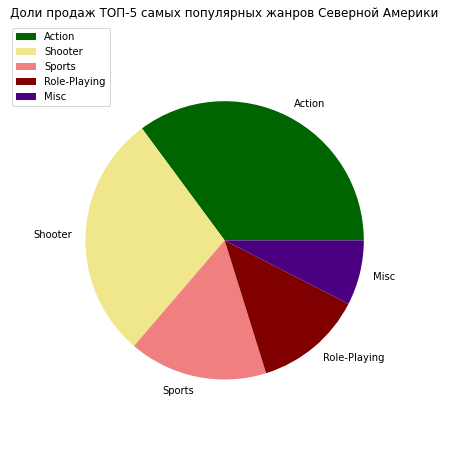

In [75]:
# визуализируем данные по самым популярным жанрам в Северной Америке
top_genre_NA.plot(kind='pie', subplots=True, figsize=(8, 8), \
                  colors=['darkgreen', 'khaki', 'lightcoral', 'maroon', 'indigo'], \
                  radius=0.8)

plt.title('Доли продаж ТОП-5 самых популярных жанров Северной Америки')
plt.ylabel('')
plt.show()

**Вывод:** самым популярным жанром игр Северной Америки является жанр 'Action' - 177.84 млн продаж.

На втором месте жанр 'Shooter' - 144.77 млн продаж. 

Третье место в ТОП-5 занимает жанр 'Sports' - 81.53 млн проданных копий.

На четвертом месте жанр 'Role-Playing' - 64.00 млн продаж.

Пятую строчку рейтинга занимает жанр 'Misc' - 38.19 млн проданных копий.

##### ТОП-5 популярных жанров Европы

Узнаем самые популярные жанры в Европе.

In [76]:
# построим сводную таблицу 'top_genre_EU', сгруппировав данные по столбцу 'genre'
top_genre_EU = (actual.groupby(['genre']).agg(EU_sales=('EU_sales', 'sum'))
               .sort_values(by='EU_sales', ascending=False)
               .head())
top_genre_EU

,EU_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


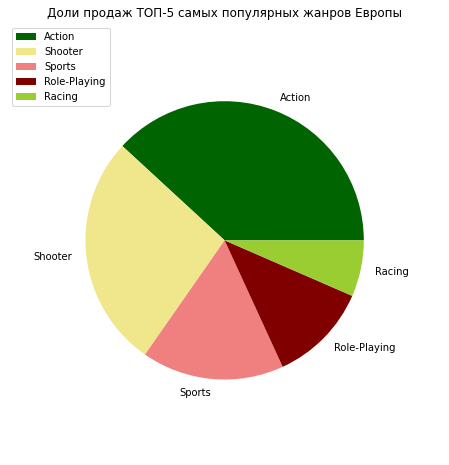

In [77]:
# визуализируем данные по самым популярным жанрам в Европе
top_genre_EU.plot(kind='pie', subplots=True, figsize=(8, 8), \
                  colors=['darkgreen', 'khaki', 'lightcoral', 'maroon', 'yellowgreen'], \
                  radius=0.8)

plt.title('Доли продаж ТОП-5 самых популярных жанров Европы')
plt.ylabel('')
plt.show()

**Вывод:** самым популярным жанром Европы является 'Action' - 159.34 млн проданных копий.

На втором месте жанр 'Shooter' - 113.47 млн проданных копий.

Третье место в рейтинге ТОП-5 занимает жанр 'Sports' - 69.09 млн продаж. 

На четвертом месте жанр 'Role-Playing' - 48.53 млн игр.

Пятую строчку занимает жанр 'Racing' - 27.29 млн игр.

##### ТОП-5 популярных жанров Японии

Исследуем самые популярные жанры в Японии.

In [78]:
# построим сводную таблицу 'top_genre_JP', сгруппировав данные по столбцу 'genre'
top_genre_JP = (actual.groupby(['genre']).agg(JP_sales=('JP_sales', 'sum'))
               .sort_values(by='JP_sales', ascending=False)
               .head())
top_genre_JP

,JP_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


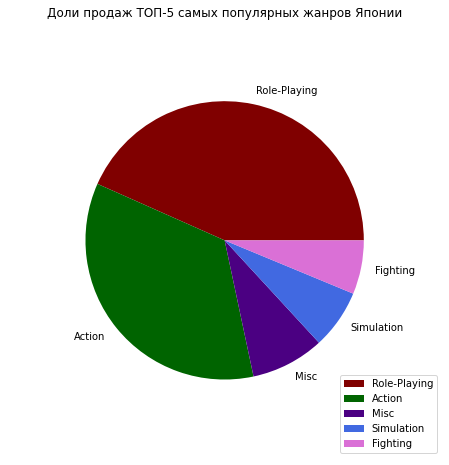

In [79]:
# визуализируем данные по самым популярным жанрам в Японии
top_genre_JP.plot(kind='pie', subplots=True, figsize=(8, 8), \
                  colors=['maroon', 'darkgreen', 'indigo', 'royalblue', 'orchid'], \
                  radius=0.8)
              
plt.title('Доли продаж ТОП-5 самых популярных жанров Японии')
plt.ylabel('')
plt.show()

**Вывод:** самым популярным жанром в Японии является - 'Role-Playing' - 65.44 млн проданных копий.

На втором месте жанр 'Action' - 52.80 млн игр. 

Третью строчку рейтинга занимает жанр 'Misc' - 12.86 млн продаж.

На четвертом месте жанр 'Simulation' - 10.41 млн проданных копий. 

Пятую строчку рейтинга занимает жанр 'Fighting' - 9.44 млн проданных копий. Отметим, что разница между жанрами 'Misc', 'Simulation' и  'Fighting' - очень маленькая. Фактически эти три жанра делят между собой третью строчку рейтинга.

##### Сравнительная характеристика ТОП-5 жанров Северной Америки, Европы и Японии

Сравним предпочтения жанров пользователей в Северной Америке, Европе и Японии.

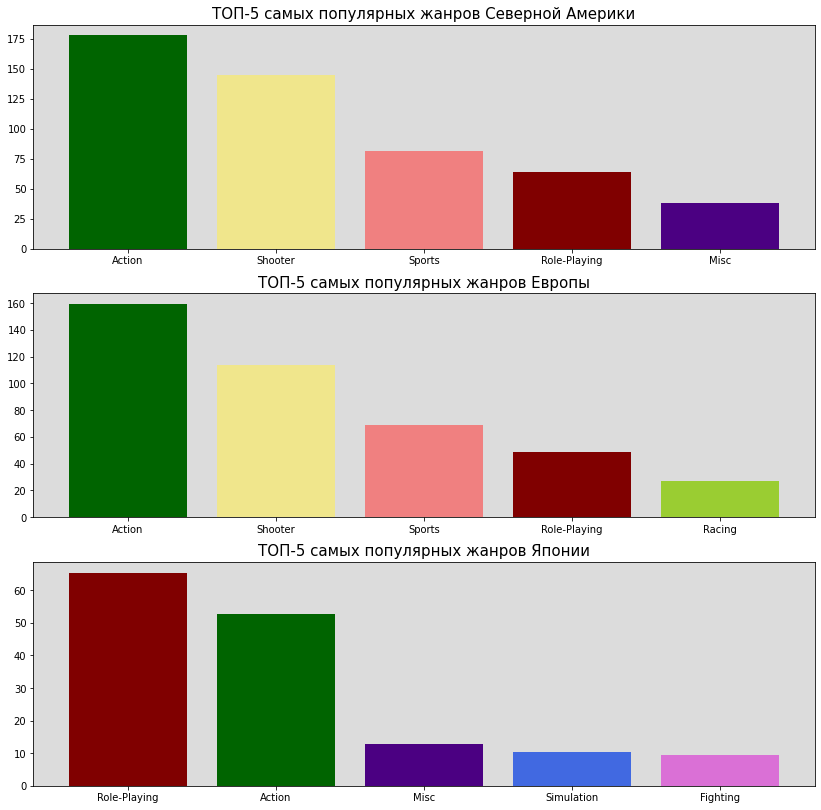

In [80]:
# передадим список жанров в Северной Америке в переменную 'x1'
x1 = top_genre_NA.index
y1 = top_genre_NA['NA_sales']
# передадим список цветов, который мы уже использовали при построении круговой диаграммы
color_1 = ['darkgreen', 'khaki', 'lightcoral', 'maroon', 'indigo']

# передадим список жанров в Европе в переменную 'x2'
x2 = top_genre_EU.index
y2 = top_genre_EU['EU_sales']
# передадим список цветов, который мы уже использовали при построении круговой диаграммы
color_2 = ['darkgreen', 'khaki', 'lightcoral', 'maroon', 'yellowgreen']

# передадим список жанров в Японии в переменную 'x3'
x3 = top_genre_JP.index
y3 = top_genre_JP['JP_sales']
# передадим список цветов, который мы уже использовали при построении круговой диаграммы
color_3 = ['maroon', 'darkgreen', 'indigo', 'royalblue', 'orchid']

fig, axes = plt.subplots(3, 1)

axes[0].bar(x1, y1, color = color_1)
axes[1].bar(x2, y2, color = color_2)
axes[2].bar(x3, y3, color = color_3)

axes[0].set_title('ТОП-5 самых популярных жанров Северной Америки', fontsize = 15)
axes[1].set_title('ТОП-5 самых популярных жанров Европы', fontsize = 15)
axes[2].set_title('ТОП-5 самых популярных жанров Японии', fontsize = 15)

axes[0].set_facecolor('gainsboro')
axes[1].set_facecolor('gainsboro')
axes[2].set_facecolor('gainsboro')


fig.set_figwidth(14)   
fig.set_figheight(14)    


plt.show()

Предпочтения в жанрах пользователей Северной Америки и Европы практически идентичны. Первые четыре строчки рейтинга занимают одни и те же жанры - это 'Action', 'Shooter', 'Sports' и 'Role-Playing'. Отличия только на пятом месте рейтинга, в Америке - 'Misc', а в Европе - 'Racing'. 

Предпочтения в жанрах пользователей Японии немного похожи на предпочтения Северной Америки. В ТОП-5 жанров Японии вошли три жанра, которые пользуются популярностью и в Северной Америке - это 'Role-Playing', 'Action' и 'Misc'. В Японии самым распространенным жанром является 'Role-Playing', этот же жанр в Северной Америке занял четвертую строчку рейтинга. На второй строчке жанр 'Action' - лидер продаж Европы и Северной Америки. На четвертом месте рейтина в Японии находится жанр 'Simulation', а на пятом 'Fighting'.

#### Исследование о влиянии рейтинга ESRB на продажи в Северной Америке, Европе и Японии

Исследуем влияние рейтинга ESRB на продажи в отдельно взятом регионе.

##### Влияние рейтинга ESRB на продажи в Северной Америке

Исследуем влияет ли рейтинг ESRB на продажи в Северной Америке.

In [81]:
# построим сводную таблицу 'rating_NA', сгруппировав данные по столбцу 'rating'
rating_NA = (actual.groupby(['rating']).agg(NA_sales=('NA_sales', 'sum'))
               .sort_values(by='NA_sales', ascending=False))
rating_NA

,NA_sales
rating,
M,231.57
E,114.37
no_rating,103.31
E10+,75.70
T,66.02


В Северной Америке пять категорий рейтинга, в том числе игры без категории 'no_rating'.

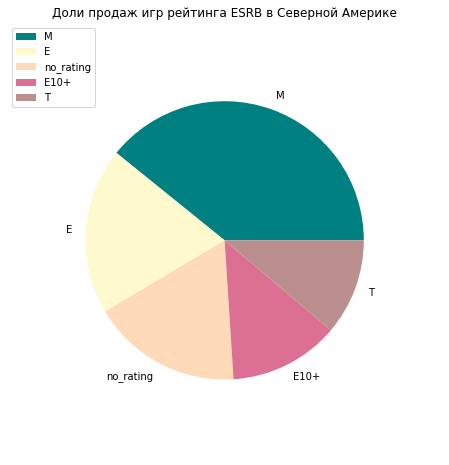

In [82]:
# визуализируем данные рейтинга
rating_NA.plot(kind='pie', subplots=True, figsize=(8, 8), \
                  colors=['teal', 'lemonchiffon', 'peachpuff', 'palevioletred', 'rosybrown'], \
                  radius=0.8)

plt.title('Доли продаж игр рейтинга ESRB в Северной Америке')
plt.ylabel('')
plt.show()

**Вывод:** cамые большие продажи игр с рейтингом 'M' («Mature») — «Для взрослых». 

На втором месте продажи рейтинга 'E' («Everyone») — «Для всех».

Третье место занимает 'no_rating' - игры без рейтинга. Разница между категорией 'E' и 'no_rating' небольшая, фактически эти две категории делят между собой вторую строчку по количеству продаж.

На четвертом месте игры с рейтингом 'E10+' «Everyone 10 and older») — «Для всех от 10 лет и старше». 

Пятое место занимают продажи игр, у которых рейтинг 'T' («Teen») — «Подросткам». Разница между продажами рейтинга 'E10+' и 'T' небольшая, фактически они делят четвертую строчку.

Можем сделать вывод, что в Северной Америке целевой аудиторией игр являются взрослые люди, и рейтинг ESRB влияет на продажи в Северной Америке, чем меньше ограничений, тем выше продажи.

##### Влияние рейтинга ESRB на продажи в Европе

Исследуем влияет ли рейтинг ESRB на продажи в Европе.

In [83]:
# построим сводную таблицу 'rating_EU', сгруппировав данные по столбцу 'rating'
rating_EU = (actual.groupby(['rating']).agg(EU_sales=('EU_sales', 'sum'))
               .sort_values(by='EU_sales', ascending=False))
rating_EU

,EU_sales
rating,
M,193.96
E,113.03
no_rating,91.50
E10+,55.37
T,52.96


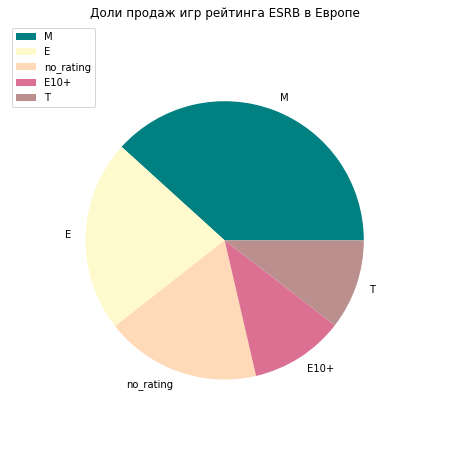

In [84]:
# визуализируем данные рейтинга
rating_EU.plot(kind='pie', subplots=True, figsize=(8, 8), \
                  colors=['teal', 'lemonchiffon', 'peachpuff', 'palevioletred', 'rosybrown'], \
                  radius=0.8)                                         

plt.title('Доли продаж игр рейтинга ESRB в Европе')
plt.ylabel('')
plt.show()

**Вывод:** cамые большие продажи игр с рейтингом 'M' («Mature») — «Для взрослых». 

На втором месте продажи рейтинга 'E' («Everyone») — «Для всех».

Третье место занимает 'no_rating' - игры без рейтинга. 

На четвертом месте игры с рейтингом 'E10+' «Everyone 10 and older») — «Для всех от 10 лет и старше». 

Пятое место занимают продажи игр, у которых рейтинг 'T' («Teen») — «Подросткам». Разница между продажами рейтинга 'E10+' и 'T' небольшая, фактически они делят четвертую строчку.

Можем сделать вывод, что в Европе, рейтинг ESRB влияет на продажи, чем меньше ограничений на возраст, тем продажи выше.

##### Влияние рейтинга ESRB на продажи в Японии

Узнаем влияет ли рейтинг ESRB на продажи игр в Японии.

In [85]:
# построим сводную таблицу 'rating_JP', сгруппировав данные по столбцу 'rating'
rating_JP = (actual.groupby(['rating']).agg(JP_sales=('JP_sales', 'sum'))
               .sort_values(by='JP_sales', ascending=False))
rating_JP

,JP_sales
rating,
no_rating,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


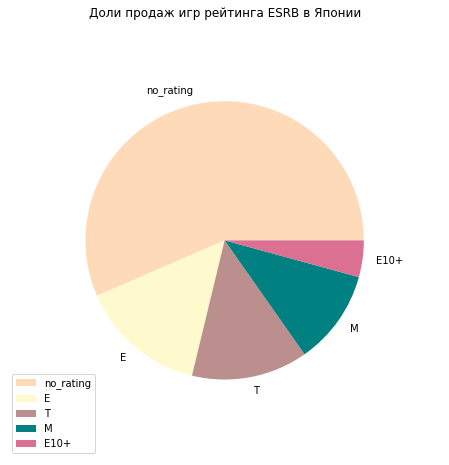

In [86]:
rating_JP.plot(kind='pie', subplots=True, figsize=(8, 8), \
                  colors=['peachpuff', 'lemonchiffon', 'rosybrown', 'teal', 'palevioletred'], \
                  radius=0.8)

plt.title('Доли продаж игр рейтинга ESRB в Японии')
plt.ylabel('')
plt.show()

**Вывод:** cамую большую долю продаж составляют игры, у которых нет рейтинга - 'no_rating'. 

На втором месте продажи рейтинга 'E' («Everyone») — «Для всех». 

Третье место занимает рейтинг 'T' («Teen») — «Подросткам». Объем продаж игр с категорией 'E' и 'T' очень близки, поэтому на круговой диаграмме доли не отличаются.

Четвертое место занимают продажи игр с возрастным ограничением 'M' («Mature») — «Для взрослых». 

На пятом месте игры с рейтингом 'E10+' «Everyone 10 and older») — «Для всех от 10 лет и старше». 

Влияние рейтинга ESRB в Японии не так однозначно, как в Северной Америке или Европе. Возможно, это связано с тем, что в Японии существует своя ассоциация, определяющая возрастной рейтинг компьютерных игр - CERO (Computer Entertainment Rating Organization). Также, мы не знаем, что стоит за рейтином - 'no_rating', напомним, что эту категорию мы присвоили вместо пропущенных значений. Поэтому мы не можем точно сказать влияет ли рейтиг ESRB на продажи в Японии.

##### Сравнительная характеристика влияния рейтинга ESRB на продажи в Северной Америке, Европе и Японии

Сравним доли продаж игр рейтинга ESRB в каждом регионе.

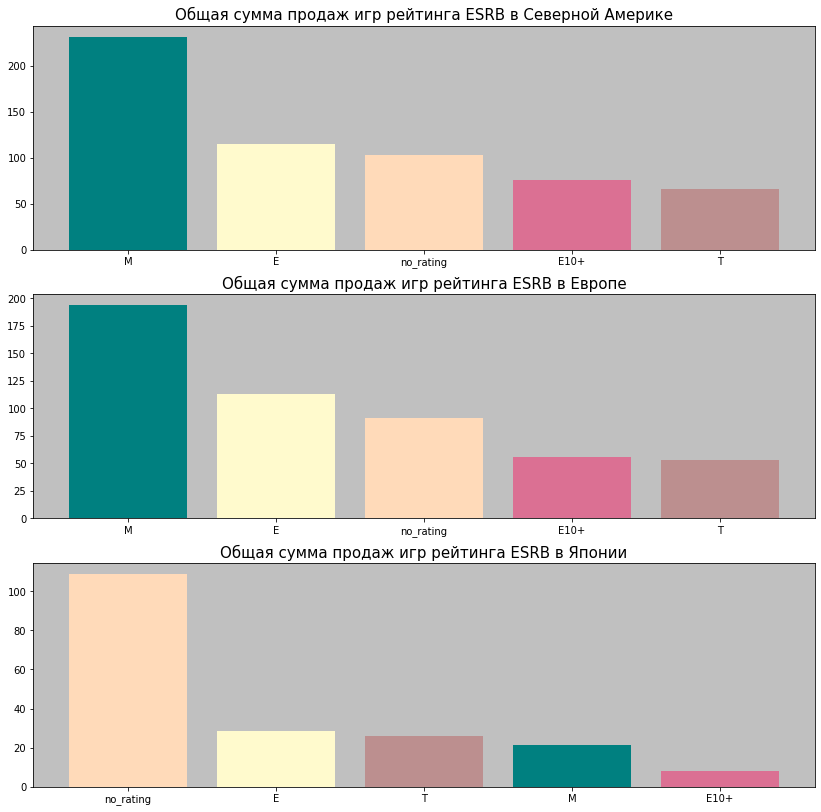

In [87]:
# передадим список категорий в Северной Америке в переменную 'x1'
x1 = rating_NA.index
y1 = rating_NA['NA_sales']
# передадим список цветов, который мы уже использовали при построении круговой диаграммы
color_1 = ['teal', 'lemonchiffon', 'peachpuff', 'palevioletred', 'rosybrown']

# передадим список категорий в Европе в переменную 'x2'
x2 = rating_EU.index
y2 = rating_EU['EU_sales']
# передадим список цветов, который мы уже использовали при построении круговой диаграммы
color_2 = ['teal', 'lemonchiffon', 'peachpuff', 'palevioletred', 'rosybrown']

# передадим список категорий в Японии в переменную 'x3'
x3 = rating_JP.index
y3 = rating_JP['JP_sales']
# передадим список цветов, который мы уже использовали при построении круговой диаграммы
color_3 = ['peachpuff', 'lemonchiffon', 'rosybrown', 'teal', 'palevioletred']

fig, axes = plt.subplots(3, 1)

axes[0].bar(x1, y1, color = color_1)
axes[1].bar(x2, y2, color = color_2)
axes[2].bar(x3, y3, color = color_3)

axes[0].set_title('Общая сумма продаж игр рейтинга ESRB в Северной Америке', fontsize = 15)
axes[1].set_title('Общая сумма продаж игр рейтинга ESRB в Европе', fontsize = 15)
axes[2].set_title('Общая сумма продаж игр рейтинга ESRB в Японии', fontsize = 15)

axes[0].set_facecolor('silver')
axes[1].set_facecolor('silver')
axes[2].set_facecolor('silver')


fig.set_figwidth(14)   
fig.set_figheight(14)    


plt.show()

Продажи игр рейтинга ESRB в Северной Америке и Европе идентичны. 

В Японии продажи игр рейтинга ESRB отличаются от Северной Америки и Европы. Первое место занимает категория 'no_rating'. На четвертом месте категория 'M' («Mature») — «Для взрослых», в то время как в Северной Америке и Европе этот рейтинг был на первом месте по объему продаж. В отличии от Северной Америки и Европы, где категория 'T' занимала пятую строчку, в Японии эта категория занимает третью строчку.

## Проверка гипотез

### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проверки этой гипотезы сформулируем нулевую и альтернативную гипотезу, а также зададим пороговое значение alpha.

```
H_0: Средние пользовательские рейтинги (user_score) платформы "XOne" = средние пользовательские рейтинги (user_score) платформы "PC"
H_a: Средние пользовательские рейтинги (user_score) платформы "XOne" ≠ средние пользовательские рейтинги (user_score) платформы "PC"
alpha = 0.05
```

Для проверки этой гипотезы мы будем использовать специальный метод - *scipy.stats.ttest_ind (array1, array2, equal_var)*, так как нам необходимо проверить средние двух выборок. 

Применим параметр *equal_var* и установим значение "False", так как выборки разного размера, и у нас есть сомнения, что дисперсии у совокупностей одинаковые.

Прежде, чем применить t-тест, удалим пропущенные значения в столбце 'user_score'.

In [88]:
data = data.dropna(subset=['user_score'])

In [89]:
# check
data.user_score.isna().sum()

0

In [90]:
# создадим массивы, содержащие выборки
array_xone = data.loc[data['platform'] == 'XOne', 'user_score']
array_pc = data.loc[data['platform'] == 'PC', 'user_score']

# зададим критический уровень статистической значимости
# если значение p-value окажется меньше значения alpha - отвергнем гипотезу
alpha = .05 

# вызов метода для проверки гипотезы
results = st.ttest_ind(array_xone, array_pc, equal_var = False)

# вывод значения p-value на экран
print('p-значение:', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

p-значение: 4.503314303116767e-06
Отвергаем нулевую гипотезу


Нулевую гипотезу подтвердить не удалось, а это значит, что средние пользовательские рейтинги платформы "XOne" и "PC" не равны.

### Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки гипотезы сформулируем нулевую и альтернативную гипотезу, а также зададим пороговое значение alpha.

```
H_0: Средние пользовательские рейтинги (user_score) жанра "Action" = средние пользовательские рейтинги (user_score) жанра "Sports"
H_a: Средние пользовательские рейтинги (user_score) жанра "Action" ≠ средние пользовательские рейтинги (user_score) жанра "Sports"
alpha = 0.05
```

Для проверки этой гипотезы используем метод - scipy.stats.ttest_ind (array1, array2, equal_var), так как нам необходимо проверить средние двух выборок.

Применим параметр equal_var и установим значение "False", так как выборки разного размера, и у нас есть сомнения, что дисперсии у совокупностей одинаковые.

In [91]:
# создадим массивы, содержащие выборки
array_action = data.loc[data['genre'] == 'Action', 'user_score']
array_sports = data.loc[data['genre'] == 'Sports', 'user_score']

# зададим критический уровень статистической значимости
# если значение p-value окажется меньше значения alpha - отвергнем гипотезу
alpha = .05 

# вызов метода для проверки гипотезы
results = st.ttest_ind(array_action, array_sports, equal_var = False)

# вывод значения p-value на экран
print('p-значение:', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

p-значение: 0.07370217419278526
Не получилось отвергнуть нулевую гипотезу 


Отвергнуть нулевую гипотезу не получилось, это значит, что средние пользовательские рейтинги жанра "Action" и "Sports" равны.

## Общий вывод

**На этапе предобработки данных мы проделали следующую работу:**
1. Заменили (привели к нижнему регистру) названия следующих столбцов: `name`, `platform`, `year_of_release`, `genre`, `other_sales`, `critic_score`, `user_score` и `rating`.
2. Удалили или заполнили пропуски в следующих столбцах:
- Удалили строки с пропусками в столбцах `name`, `genre` и `year_of_release`.
- Заменили значения 'tbd' в столбце `user_score` на 'nan'.
- В столбце `rating` категорию 'K-A' заменили на категорию 'E'. Удалили данные, содержащие категорию 'RP'. Заменили пропущенные значения на 'no_rating' - без рейтинга или рейтиг не определен.
3. Заменили вещественный тип данных в столбце `year_of_release` - год выпуска, на целочисленный. Столбец `user_score` - оценка пользователей, привели к вещественному типу данных.
4. Добавили новый столбец - `total_sales` - суммарные продажи во всех регионах.

**Провели исследовательский анализ данных:**

*1. Исследовали данные по количеству игр, выпущенных в разные годы.*
- Самое большое количество игр было выпущено в 2008 году.
- Самое маленькое количество игр было выпущено в 1980 году.

*2. Исследовали данные о динамике продаж по платформам.*
- Среднее время существования игровой платформы - 10 лет, при этом первые пять лет продажи растут, остальное время - падают.

*3. Исследовали данные платформ по продажам за актуальный период.*
- `PS4` - 314.14 млн проданных копий;
- `PS3` - 288.79 млн проданных копий;
- `X360` - 236.54 млн проданных копий;
- `3DS` - 194.61 млн проданных копий;
- `XOne` - 159.32 млн проданных копий;
- `WiiU` - 82.19 млн проданных копий;
- `PC` - 62.65 млн проданных копий;
- `PSV` - 49.18 млн проданных копий;
- `Wii` - 35.37 млн проданных копий;
- `DS` - 12.55 млн проданных копий;
- `PSP` - 11.19 млн проданных копий.

*4. Исследовали данные графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.* Для каждой платформы построили график и описали наши наблюдения.

*5. Исследовали влияние отзывов на продажи внутри платформы.*
- Уровень продаж на платформе зависит от оценки критиков, чем выше оценка, тем выше уровень продаж.

*6. Исследовали распределение игр по жанрам.*
- Самыми распространенными жанрами среди игр являются жанры `Action`, `Role-Playing` и `Adventure`. 
- Самыми редкими жанрами среди игр являются жанры `Simulation`, `Strategy` и `Puzzle`.

*7. Исследовали портрет пользователя в Северной Америке, Европе и Японии.* 
- В Северной Америке самая популярная платформа `X360`, самый популярный жанр - `Action`.
- В Европе самая популярная платформа `PS4`, самый популярный жанр - `Action`.
- В Японии самая популярная платформа `3DS`, самый популярный жанр - `Role-Playing`.

*8. Исследовали влияние рейтинга ESRB на продажи в Северной Америке, Европе и Японии.*
- Уровень продаж в Северной Америке и Европе зависит от рейтинга ESRB, чем больше возрастных ограничений имеет игра, тем ниже уровень продаж.
- Уровень продаж в Японии не зависит от рейтинга ESRB.


**Провели проверку гипотез и установили, что:**
1. Средние пользовательские рейтинги платформы `XOne` и `PC` статистически значимо различаются.
2. Средние пользовательские рейтинги жанра `Action` и `Sports` статистически значимо не различаются.

**Рекомендуем обратить внимание на сбор следующих данных: отзывы критиков и пользователей на платформах, и данные по рейтингу ESRB, так как много данных было утеряно и столбцы содержали пропущенные значения.**